# `scikit-learn` vs. `statsmodel`

Both scikit-learn -- which we used last class -- and [statsmodels](https://www.statsmodels.org/stable/index.html) can do regression modeling.  Today we'll use statsmodels for our analysis.  Whereas scikit-learn is a powerful library for machine learning in general, statsmodels is a bit more focused on statistical analyses of the type you are likely to encounter for your own data.  Both libraries have their strengths, and both will work well for a variety of applications.

If necessary, you can use `pip` to install statsmodels:

In [106]:
# comment out or remove code block if you don't need this
# !conda install statsmodels

Let's also get Numpy and Matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

statsmodels is typically imported as `sm` - if this is the very first time you've imported it or if you've just installed it, this next import step could take several seconds (don't worry). One thing to notice is that the import command isn't simply for 'statsmodels', but rather for 'statsmodels.api'.  This is different than we've done things for other libraries, and there is a description of why we might import the library this way [here](https://www.statsmodels.org/stable/api-structure.html#importpaths).  Note that you could also import directly, see [here](https://www.statsmodels.org/stable/api-structure.html#direct-import-for-programs).

Let's get statsmodels now:

In [2]:
import statsmodels.api as sm

C:\Users\mayae\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


We're going to repeat the first example from Monday's lesson.  Let's create a simple synthetic set of $X$ and $Y$ data that are related to one another:

In [3]:
# First, generate the same synthetic data
np.random.seed(1999)  # seed for class reproducibility
n_samples = 128

# Create the independent variable X and the noise
noise_magnitude = 0.5
X = 2* np.random.rand(n_samples, 1)
noise = noise_magnitude * np.random.randn(n_samples, 1)

# Set the intercept and slope
intercept = 4
slope = 3

# Create the dependent variable y
y = intercept + (slope * X) + noise

Statsmodels uses a different syntax than scikit-learn.  First, if we want a constant term (intercept) in our regression model, we'll need to add one to our predictor variabile, $X$.  Fortunately, statsmodels anticipates this, and comes with a built-in function to do this, [.add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html):

In [4]:
# use statsmodels to add a constant term to our predictor
X_with_constant = sm.add_constant(X)
print(X_with_constant)

[[1.         1.64904035]
 [1.         1.96925352]
 [1.         1.78628903]
 [1.         0.63929383]
 [1.         1.18651341]
 [1.         0.39098463]
 [1.         1.72043352]
 [1.         1.72860103]
 [1.         0.1572357 ]
 [1.         1.43382415]
 [1.         1.45068462]
 [1.         1.47009556]
 [1.         1.589834  ]
 [1.         0.73502961]
 [1.         1.8765437 ]
 [1.         0.91297869]
 [1.         1.96287499]
 [1.         0.64557041]
 [1.         1.88260535]
 [1.         0.00496384]
 [1.         0.58447617]
 [1.         0.55781629]
 [1.         1.27475049]
 [1.         1.46251061]
 [1.         0.24613692]
 [1.         0.66702902]
 [1.         1.97269407]
 [1.         1.66901068]
 [1.         0.51556866]
 [1.         1.85190862]
 [1.         0.35154725]
 [1.         0.96412173]
 [1.         0.94472471]
 [1.         0.57969239]
 [1.         0.55170277]
 [1.         0.72969535]
 [1.         1.69598646]
 [1.         0.28829068]
 [1.         1.66057287]
 [1.         0.46382363]


You can see the left-most column in our predictor matrix is a column of ones.  This is what allows the model to find the intercept (constant) term in our regression equation. Without this, statsmodels would assume our regression has an intercept of zero.

We can now fit our model.  Note that, unlike scikit-learn, the regression model is first called directly like a function (e.g we don't 'declare' the model first, we go right to passing the variables to the code).  [Here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) is the documentation for the OLS model.

In [5]:
# Fit the model using statsmodels OLS
model = sm.OLS(y, X_with_constant)
type(model) # model is a statsmodel linear model OLS object

statsmodels.regression.linear_model.OLS

Since `model` is an object now, we see the results by operating on `model` as an object:

In [6]:
results = model.fit()

`results` is now an object too, and we can see the output from the regression model by using the `.summary` operation:

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1454.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.67e-71
Time:                        12:44:46   Log-Likelihood:                -96.091
No. Observations:                 128   AIC:                             196.2
Df Residuals:                     126   BIC:                             201.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0323      0.092     43.996      0.000       3.851       4.214
x1             2.9607      0.078     38.137      0.000       2.807       3.114
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.319
Skew:                           0.249   Prob(JB):                        0.517
Kurtosis:                       2.993   Cond. No.                         3.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because statsmodels is built for regression modeling (amongst other tasks), it provides rich output from the model fit results.  For instance, you can see the $R^2$ value and the adjusted $R^2$.  You also get other diagnostic statistics like the Akaike Information Criterion (AIC, https://en.wikipedia.org/wiki/Akaike_information_criterion), Bayesian information criterion (BIC, https://en.wikipedia.org/wiki/Bayesian_information_criterion), the probability (based on the F-statistic), and the Log-likelihood (a goodness-of-fit measure where a regression model with a higher log likelihood indicates a better regression model than one with a lower log likelihood value).  

You can also see the coefficients of your model - the constant (intercept) term is estimated as 4.0323 (very close to the known value of 4) with a standard error of 0.092 and a very high probability of being significant.  The 95% range is also shown (3.851 and 4.214), indicating that the coefficient very likely does NOT include zero.  For 'x1' (the coefficient associate with the variable $X$), we see the estimate is 2.9607 (again, very close to the known value of 3), highly significant, and again with a 95% confidence interval that does not span zero. 

[This Medium post](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a) is a reasonable good review of the outcome of the OLS regression in statsmodels.

We can then use our model to predict y:


In [8]:
# Predict y using our model - be sure to pass .predict the matrix with the constant term column!
y_pred = results.predict(X_with_constant)

To mimic the diagnostic statistics from scikit-learn, we can use the following code.  For $R^2$ and the MSE we can simply extract the value from the results summary. We then calculate RMSE by hand:

In [9]:
# Get the R-squared and MSE from the model and then calculate RMSE from MSE
r_squared = results.rsquared # just pull the statistic you want from 
mse = results.mse_resid
rmse = np.sqrt(mse)

# Display those statistics
print(f"R2: {r_squared:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R2: 0.9203
MSE: 0.2669
RMSE: 0.5167


If you want to see all the properties of `results` (e.g other statistics from the regression model fit), you can go [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html).  Alternatively, if you type `dir(results)` this will list all the properties (and methods) associated with the object:

In [10]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

Let's make out plot now:

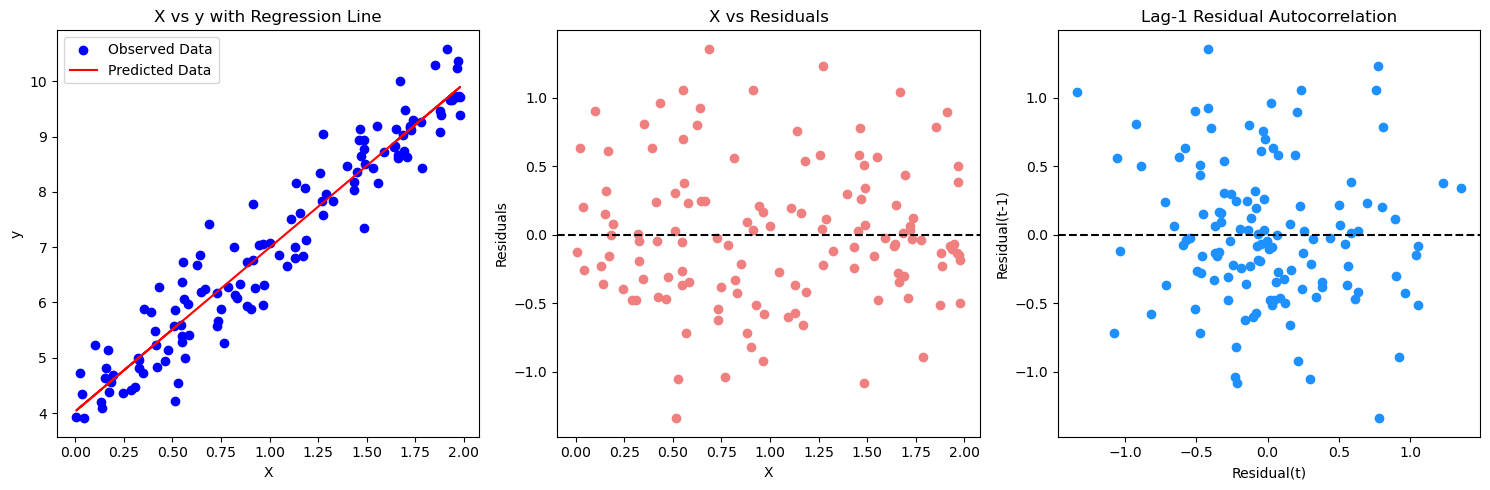

In [11]:
# Create the diagnostic plots
plt.figure(figsize=(15, 5))

# First plot: Observed vs Predicted data with regression line
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Observed Data')
plt.plot(X, y_pred, color='red', label='Predicted Data')
plt.title('X vs y with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Second plot: Residuals vs X
residuals = y.ravel() - y_pred # note that we need to flatten or `ravel` y here because statsmodels makes y_pred a singleton variable (128,), whereas y is (128,1) !

plt.subplot(1, 3, 2)
plt.scatter(X, residuals, color='lightcoral')
plt.axhline(0, color='black', linestyle='--')
plt.title('X vs Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')

# Third plot: Lagged residual autocorrelation
residuals_shifted = np.roll(residuals, 1)

plt.subplot(1, 3, 3)
plt.scatter(residuals[1:], residuals_shifted[1:], color='dodgerblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Lag-1 Residual Autocorrelation')
plt.ylabel('Residual(t-1)')
plt.xlabel('Residual(t)')

plt.tight_layout()
plt.show()